<a href="https://colab.research.google.com/github/sakuronohana/my_datascience/blob/master/udemy/mlaz/Part%202%20-%20Regression/Section%207%20-%20Support%20Vector%20Regression%20(SVR)/Python/support_vector_regression_tools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

Das SVR Modell basiert auf der Support Vector Machine, welche für die Regression wie auch für die Klassifizierung verwendet werden kann. 
Im Gegensatz zur linearen Regression bei welchem sich das Modell für alle Datenpunkte unter oder oberhalb der Best-Fit Linie interessiert, wird beim SVM zuest eine sogenannter Insensitive Tube (oder auch Vektorraum) erstellt. Danach interessiert sich das Modell nur noch für Datenpunkte unter und oberhalb dieses Tubes.


Eine kleine Einführungsvideo zu SVR [Link](https://www.udemy.com/course/machinelearning/learn/lecture/19505880#content)

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
daturl = 'https://raw.githubusercontent.com/sakuronohana/my_datascience/master/udemy/mlaz/Part%202%20-%20Regression/Section%207%20-%20Support%20Vector%20Regression%20(SVR)/Python/Position_Salaries.csv'
dataset = pd.read_csv(daturl)


In [3]:
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

Wir müssen nun noch sicherstellen, dass X und y sind im gleichen Format. 
Fearture Scaling erwartet, dass beide Datensätze in eine 2 dimensional Format erscheinen. Dafür müssen wir y nun einem Reshape unterziehen.

In [4]:
# Wandelt y in eine 2D Array um.
y = y.reshape(len(y),1) 

# Mit der Funktion len weisen wir reshape an 
# den Array genau so Gross zu machen wie die orginale Länge ist.

In [5]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


## Feature Scaling

Kurz zur Erinnerung. Wir skalieren die Daten um ein einheitliches Format (-3/+3) zu erhalten mit welchem die Maschine etwas anfangen kann. Dabei können wir die unabhängigen und unabhängige Variable nicht mit dem gleichen Scaler umwandeln, da der Mean unterschiedlich ist.

In [6]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [15]:
print (X)


[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [16]:
print (y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

Wichtig hierbei ist noch zu erwähnen, dass SVM auf verschiedenen Kernel basiert, welcher wir bei der Definition der Klasse einsetzen müssen.

In [10]:
from sklearn.svm import SVR

regressor = SVR(kernel = 'rbf') # Gaussian Radial Basis Function (RBF) Kernel 
regressor.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicting a new result

Im Polynominal Regression Modell haben wir am Schluss auf der Basis eines einzelnen Werts (Erfahrungsjahre 6.5) eine Prediction durchgeführt. Nachfolgend tuen wir das gleichem mit SVR. Der einzige Unterschied hierbei ist, dass wir im PR Modell keine Fearture Skalierung gemacht haben und hier schon. Wir müssen also den einzelnen Wert, denn wir Predicten wollen noch dem Feature Scaling von X (sc_x.fit_transform(y)) unterziehen. Damit wir danach wieder den Y Wert (Jahresgehalt) erhalten, müssen wir auch noch die Skalierung von Y wieder umkehren (inverse).

**Achtung** Der Wert muss nur transformiert aber nicht gefittet werden.

In [19]:
print('Diesen Wert erhalten wir, wenn wir die Skalierung von Y beibehalten:')
regressor.predict(sc_X.transform([[6.5]]))

print('Nicht wirklich vielsagen oder?')

Diesen Wert erhalten wir, wenn wir die Skalierung von Y beibehalten:
Nicht wirklich vielsagen oder?


In [32]:
# Nun machen wir die Transformation für y mittels der Funktion Inverse Transform rückgängig
prednew = sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))

print('Der prognostizierte Jahressalär für 6.5 Jahre Berufserfahrung ist somit',np.round(prednew))

Der prognostizierte Jahressalär für 6.5 Jahre Berufserfahrung ist somit [170370.]


## Visualising the SVR results

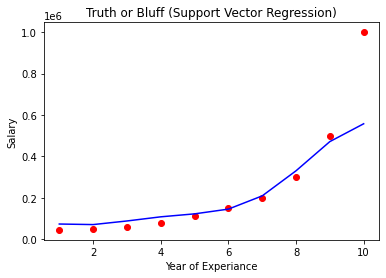

In [50]:
# Damit wir die Resultate visualisieren können müssen wir auch hier die Skalierung rückgängig machen
# Würden wir hier keinen Inverse machen, dann hätten wir anstelle der Erfahrungsjahre einen Wertebereich
# von -1.5 bis 1.5
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y), color = 'red')

# Auch bei der nächsten Code-Line müssen wir die Skalierung im Auge behalten.
plt.plot(sc_X.inverse_transform(X),sc_y.inverse_transform(regressor.predict(X)), color='blue')
plt.title('Truth or Bluff (Support Vector Regression)')
plt.xlabel('Year of Experiance')
plt.ylabel('Salary')
plt.show()


## Visualising the SVR results (for higher resolution and smoother curve)

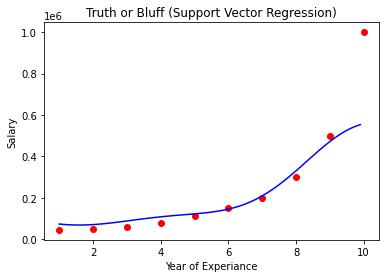

In [53]:

X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue')
plt.title('Truth or Bluff (Support Vector Regression)')
plt.xlabel('Year of Experiance')
plt.ylabel('Salary')
plt.show()

Im Gegensatz zum PR Modell findet mittels SVR keine Overfitting statt.